In [1]:
psrname='J1022+1001'

In [2]:
spna_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/'+psrname+'/TM_WN_RN30_DM100/ptmcmc/'
spnta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [3]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
from diff_chain import  Diff_chain_shift

2023-03-23 22:28:50.494080: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-23 22:28:50.542479: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-23 22:28:50.543521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 22:28:51.293693: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
epta_spna_1=np.loadtxt(spna_dir+'chain_1.txt')
par_epta_spna=pd.read_csv(spna_dir+'pars.txt', header = None)
lspn=len(par_epta_spna)
epta_spna_2=epta_spna_1.T

In [5]:
epta_spnta_1=np.loadtxt(spnta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_epta_spnta=pd.read_csv(spnta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lspnt=len(par_epta_spnta)
epta_spnta_2=epta_spnta_1.T

In [6]:
spna_arr=[epta_spna_2[lspn-1],epta_spna_2[lspn-2],epta_spna_2[lspn-3],epta_spna_2[lspn-4]]

spnta_arr=[epta_spnta_2[lspnt-4],epta_spnta_2[lspnt-3],epta_spnta_2[lspnt-2],epta_spnta_2[lspnt-1]]

spna_arr_red=[epta_spna_2[lspn-1],epta_spna_2[lspn-2]]

spnta_arr_red=[epta_spnta_2[lspnt-4],epta_spnta_2[lspnt-3]]

spna_arr_dm=[epta_spna_2[lspn-3],epta_spna_2[lspn-4]]

spnta_arr_dm=[epta_spnta_2[lspnt-2],epta_spnta_2[lspnt-1]]

# Tension Considering red+dm

In [9]:
names = ['rn_logA','rn_gamma','dm_logA','dm_gamma']
labels=['\log A_R','\gamma_R', '\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

spna=MCSamples(samples=np.array(spna_arr).transpose(),loglikes=epta_spna_2[-3],names=names,labels=labels,label='SPNA')
spnta=MCSamples(samples=np.array(spnta_arr).transpose(),loglikes=epta_spnta_2[-1],names = names,labels=labels,label='SPNTA \n'+psrname)

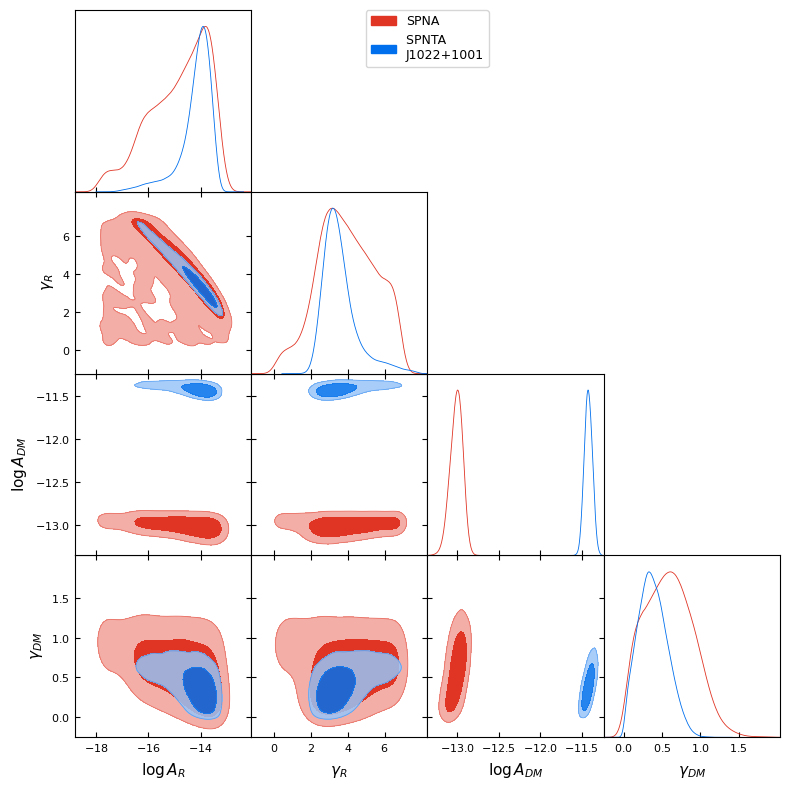

In [10]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna,spnta], filled=True)
plt.savefig(psrname+'_R_DM_EPTA_All.png',dpi=300)
plt.show()

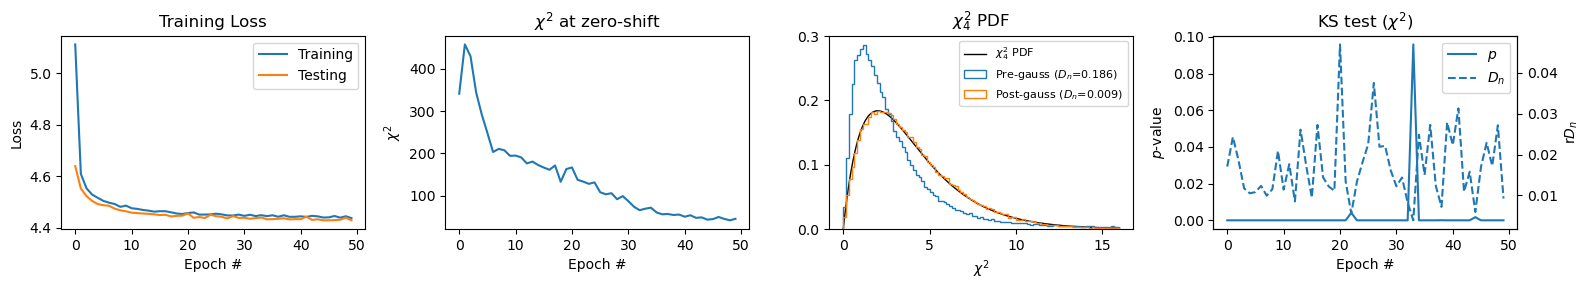

64/64 [==============================] - 4s 66ms/step - loss: 4.4382 - val_loss: 4.4296 - shift0_chi2: 46.1091 - shift0_pval: 1.0000 - shift0_nsigma: 5.9724 - chi2Z_ks: 0.0092 - chi2Z_ks_p: 7.7060e-08 - lr: 0.0100


/media/root1/3PAR/sdandapat/work_dir/diff_chain.py:53: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


In [11]:
%matplotlib inline
diff_chain, nsig, chi_2, D_B=Diff_chain_shift(spna,spnta)

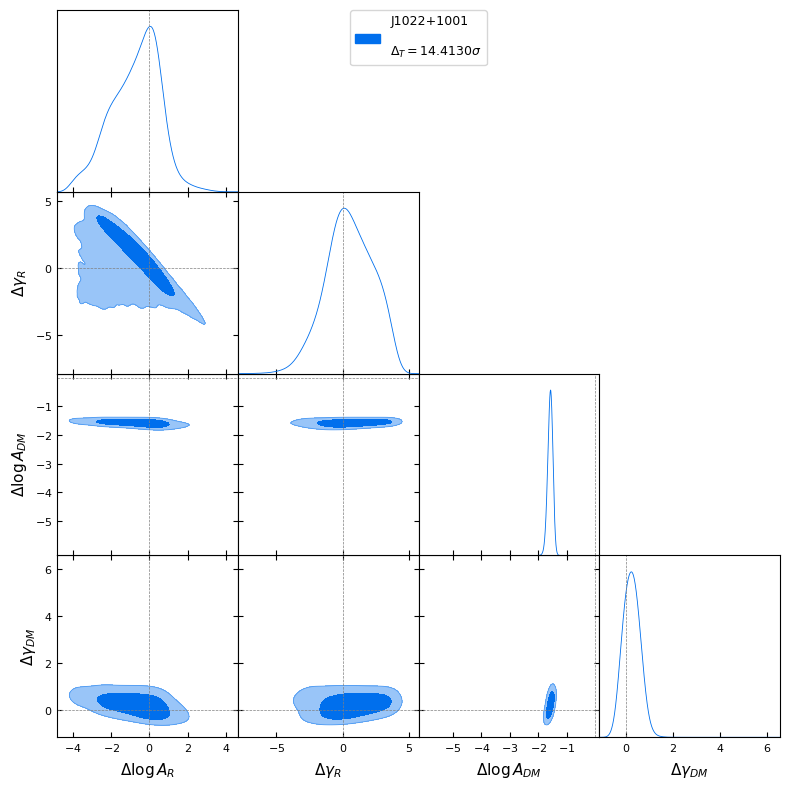

In [13]:
%matplotlib inline
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_EPTA_All.png',dpi=300)

# Tension considering red noise Only

In [14]:
names_r = ['rn_logA','rn_gamma']
labels_r=['\log A_R','\gamma_R']

spna_red=MCSamples(samples=np.array(spna_arr_red).transpose(),loglikes=epta_spna_2[-3],names=names_r,labels=labels_r,label='SPNA')
spnta_red=MCSamples(samples=np.array(spnta_arr_red).transpose(),loglikes=epta_spnta_2[-1],names = names_r,labels=labels_r,label='SPNTA \n'+psrname)

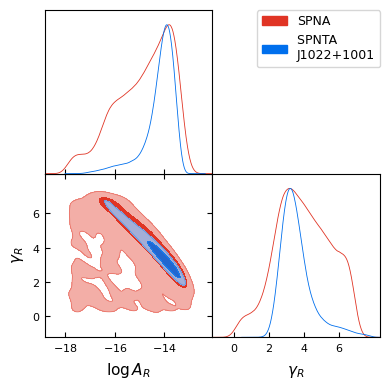

In [15]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_red,spnta_red], filled=True)
plt.savefig(psrname+'_R_DM_EPTA_red.png',dpi=300)
plt.show()

In [16]:
names_dm = ['dm_logA','dm_gamma']
labels_dm=['\log A_{DM}','\gamma_{DM}']

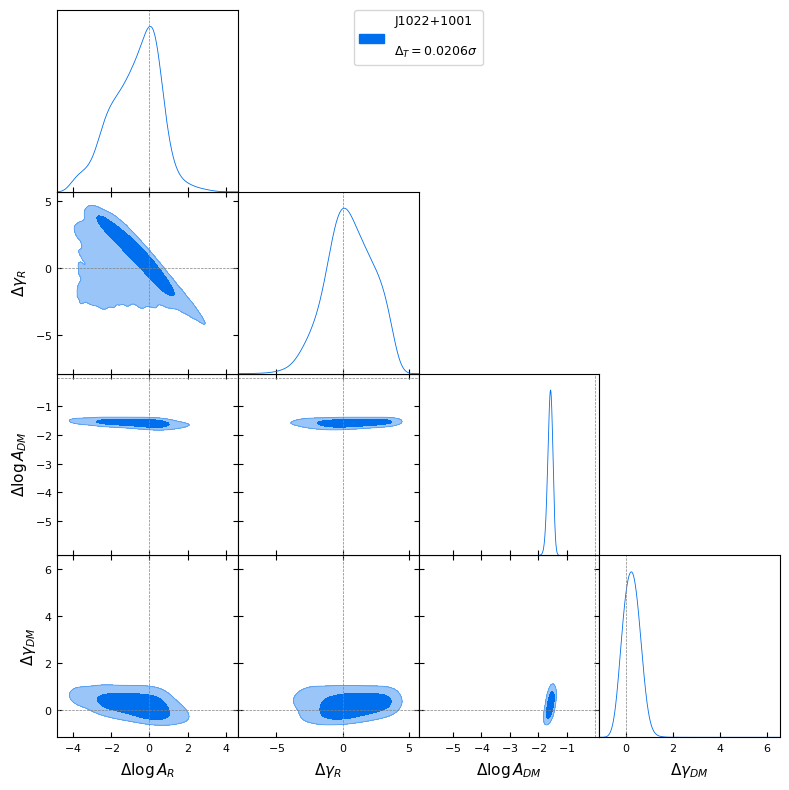

In [18]:
%matplotlib inline
diff_chain_r, shift_probability_r, pl_r, pu_r=Diff_chain_shift(spna_red,spnta_red)
g = plots.get_subplot_plotter()
nsig_r=utilities.from_confidence_to_sigma(shift_probability_r)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_r))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_EPTA_red.png',dpi=300)

# Tension considering dm noise only

In [19]:
spna_dm=MCSamples(samples=np.array(spna_arr_dm).transpose(),loglikes=epta_spna_2[-3],names=names_r,labels=labels_r,label='SPNA')
spnta_dm=MCSamples(samples=np.array(spnta_arr_dm).transpose(),loglikes=epta_spnta_2[-1],names = names_r,labels=labels_r,label='SPNTA \n'+psrname)

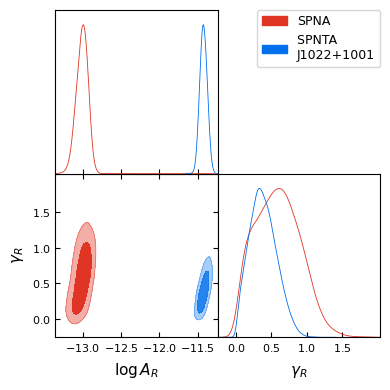

In [20]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_dm,spnta_dm], filled=True)
plt.savefig(psrname+'_R_DM_EPTA_dm.png',dpi=300)
plt.show()

/media/root1/3PAR/sdandapat/work_dir/diff_chain.py:30: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


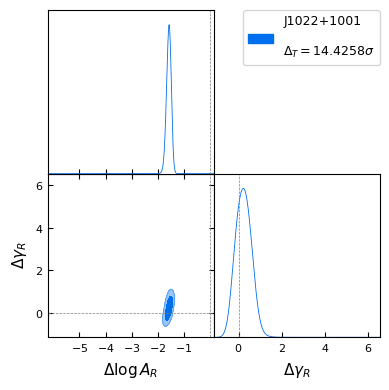

In [21]:
%matplotlib inline
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(spna_dm,spnta_dm)
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_EPTA_dm.png',dpi=300)